<a href="https://colab.research.google.com/github/ChristalL99/ECON211_DecisionTree/blob/main/Decision_Tree_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set environment and import toolboxes
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


This dataset comprehends three factors which we expect to explore: "Annual Income", "Credit Score" and "Current Loan Amount".

This study aims to explore how a customer's "Annual Income", "Credit Score" influence his/her "Current Loan Amount".

## **Step 1: Data Preprocessing**

In [2]:
# read in the data file and show the columns

# drop the rows with null values since there is sufficient data
raw_data = pd.read_csv("https://raw.githubusercontent.com/ChristalL99/Econ211_DecisionTree/main/credit_data.csv").dropna()
df = raw_data[["Annual Income", "Credit Score", "Current Loan Amount"]]
df

,Annual Income,Credit Score,Current Loan Amount
2,2231892.0,741.0,99999999.0
6,1184194.0,730.0,217646.0
8,2559110.0,678.0,548746.0
10,714628.0,728.0,99999999.0
12,776188.0,740.0,99999999.0
...,...,...,...
99990,1190046.0,742.0,99999999.0
99993,1152426.0,717.0,44484.0
99994,783389.0,719.0,210584.0
99996,1289416.0,732.0,99999999.0


In [3]:
# Classify the current loan amount into 3 classes uniformly: "Low", "Average", "High"
df["Current Loan Amount"]=pd.qcut(df["Current Loan Amount"], 3, labels=["Low","Average","High"])
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Annual Income,Credit Score,Current Loan Amount
2,2231892.0,741.0,High
6,1184194.0,730.0,Low
8,2559110.0,678.0,High
10,714628.0,728.0,High
12,776188.0,740.0,High
...,...,...,...
99990,1190046.0,742.0,High
99993,1152426.0,717.0,Low
99994,783389.0,719.0,Low
99996,1289416.0,732.0,High


## **Step 2: Build Decision Tree**

In [4]:
# Identify the features and the target variable
feature_names=["Annual Income","Credit Score"]
features=df[feature_names]
targets=df["Current Loan Amount"]

In [5]:
# Split training and test dataset by 8:2
train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.2, random_state=42, shuffle=True)

In [6]:
#####Optimizing Decision Tree Performance
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(train_features, train_targets)

# Predict the response for test dataset
y_pred = clf.predict(test_features)

# Compute test set accuracy 
acc = accuracy_score(y_pred, test_targets)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.47


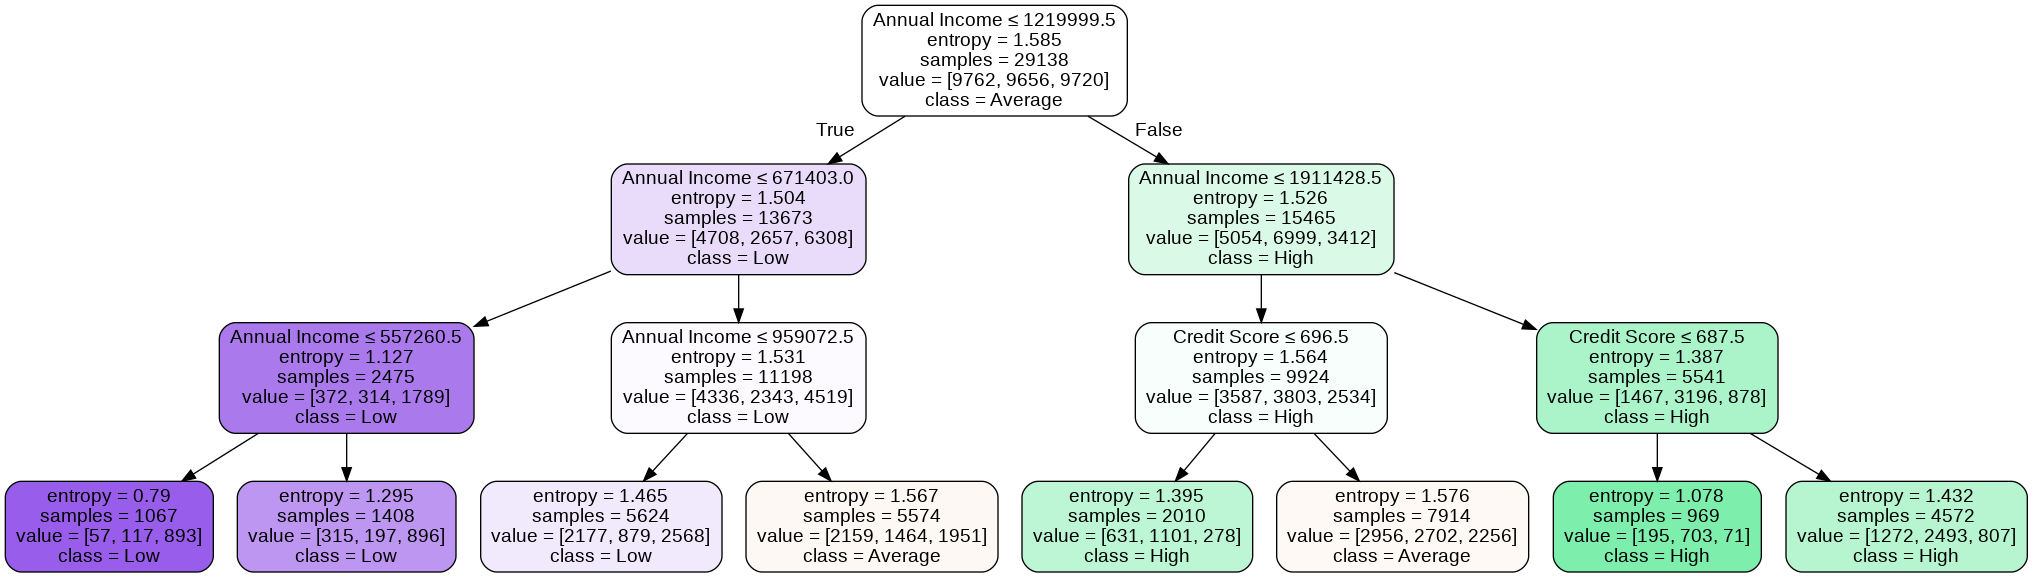

In [7]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_names, 
                class_names=clf.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DecisionTree_Graph.png')
Image(graph.create_png())